# Problem 2: Diabetes Dataset Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Set seed for reproducibility
SEED = 14
np.random.seed(SEED)

In [2]:
# load the dataset
df = pd.read_csv('../data/raw/diabetes_data_raw.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()
print(f"\nFirst few rows:")
df.head()

Dataset shape: (768, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

First few rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# dataset summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## A) Random Sampling and Glucose Analysis

In [4]:
# take a random sample of 25 observations
sample_size = 25
sample_df = df.sample(n=sample_size, random_state=SEED)

# calculate Glucose statistics for sample
sample_glucose_mean = sample_df['Glucose'].mean()
sample_glucose_max = sample_df['Glucose'].max()

# calculate Glucose statistics for population
pop_glucose_mean = df['Glucose'].mean()
pop_glucose_max = df['Glucose'].max()

# display results
print("=" * 60)
print("PART A: GLUCOSE STATISTICS COMPARISON")
print("=" * 60)
print(f"\nSample Size: {sample_size}")
print(f"Population Size: {len(df)}")
print(f"\n{'Statistic':<20} {'Sample':<15} {'Population':<15} {'Difference':<15}")
print("-" * 65)
print(f"{'Mean Glucose':<20} {sample_glucose_mean:<15.2f} {pop_glucose_mean:<15.2f} {abs(sample_glucose_mean - pop_glucose_mean):<15.2f}")
print(f"{'Max Glucose':<20} {sample_glucose_max:<15.0f} {pop_glucose_max:<15.0f} {abs(sample_glucose_max - pop_glucose_max):<15.0f}")
print("=" * 60)

PART A: GLUCOSE STATISTICS COMPARISON

Sample Size: 25
Population Size: 768

Statistic            Sample          Population      Difference     
-----------------------------------------------------------------
Mean Glucose         115.60          120.89          5.29           
Max Glucose          181             199             18             


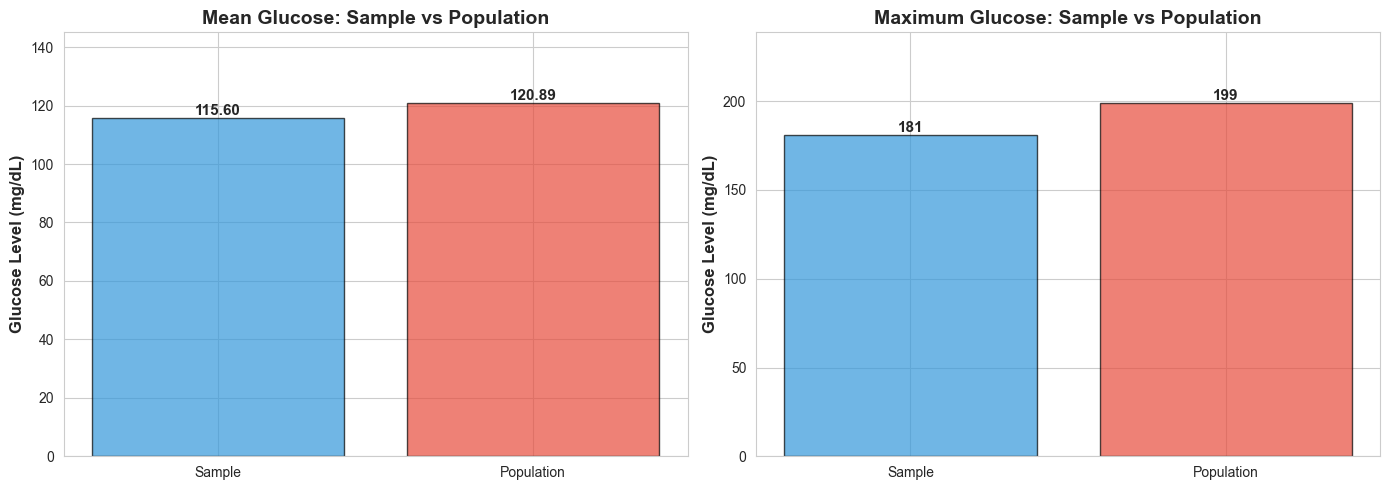

Chart saved!


In [5]:
# visualization 1 bar chart comparing mean and max glucose
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# mean comparison
ax1 = axes[0]
categories = ['Sample', 'Population']
means = [sample_glucose_mean, pop_glucose_mean]
bars1 = ax1.bar(categories, means, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Glucose Level (mg/dL)', fontsize=12, fontweight='bold')
ax1.set_title('Mean Glucose: Sample vs Population', fontsize=14, fontweight='bold')
ax1.set_ylim([0, max(means) * 1.2])
# add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# max comparison
ax2 = axes[1]
maxes = [sample_glucose_max, pop_glucose_max]
bars2 = ax2.bar(categories, maxes, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
ax2.set_ylabel('Glucose Level (mg/dL)', fontsize=12, fontweight='bold')
ax2.set_title('Maximum Glucose: Sample vs Population', fontsize=14, fontweight='bold')
ax2.set_ylim([0, max(maxes) * 1.2])
# add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('../figures/part_a_glucose_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved!")

C:\Users\szain\AppData\Local\Temp\ipykernel_7480\3059930297.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(data_to_plot, labels=['Sample', 'Population'],


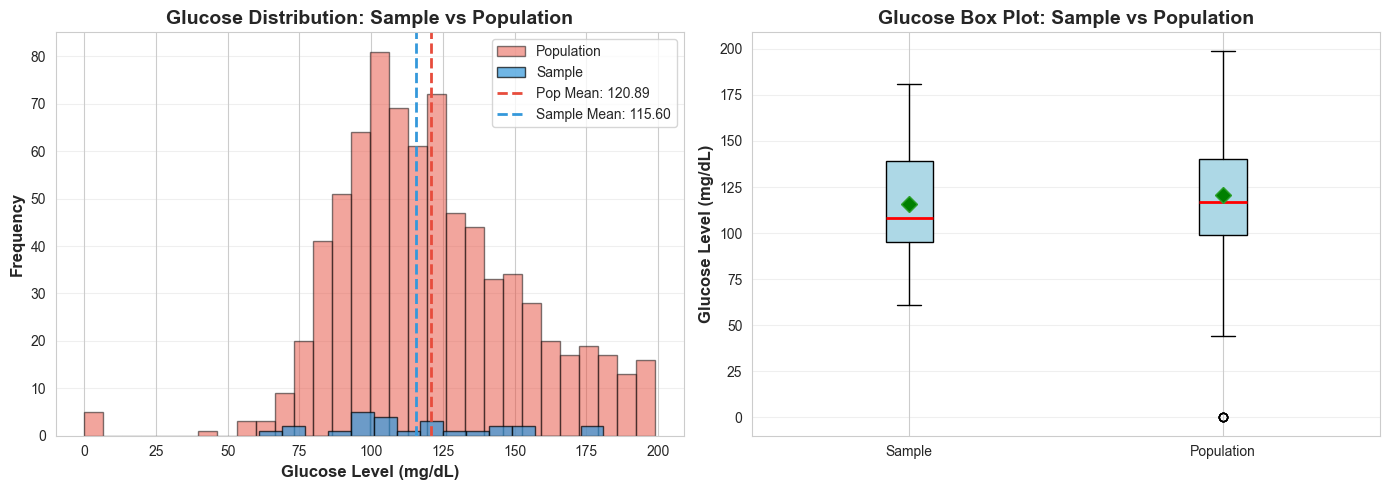

Chart saved!


In [6]:
# visualization 2 distribution comparison with histogram and box plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# histogram overlay
ax1 = axes[0]
ax1.hist(df['Glucose'], bins=30, alpha=0.5, label='Population', color='#e74c3c', edgecolor='black')
ax1.hist(sample_df['Glucose'], bins=15, alpha=0.7, label='Sample', color='#3498db', edgecolor='black')
ax1.axvline(pop_glucose_mean, color='#e74c3c', linestyle='--', linewidth=2, label=f'Pop Mean: {pop_glucose_mean:.2f}')
ax1.axvline(sample_glucose_mean, color='#3498db', linestyle='--', linewidth=2, label=f'Sample Mean: {sample_glucose_mean:.2f}')
ax1.set_xlabel('Glucose Level (mg/dL)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Glucose Distribution: Sample vs Population', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# box plot comparison
ax2 = axes[1]
data_to_plot = [sample_df['Glucose'], df['Glucose']]
bp = ax2.boxplot(data_to_plot, labels=['Sample', 'Population'], 
                 patch_artist=True, showmeans=True,
                 boxprops=dict(facecolor='lightblue', edgecolor='black'),
                 medianprops=dict(color='red', linewidth=2),
                 meanprops=dict(marker='D', markerfacecolor='green', markersize=8))
ax2.set_ylabel('Glucose Level (mg/dL)', fontsize=12, fontweight='bold')
ax2.set_title('Glucose Box Plot: Sample vs Population', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/part_a_glucose_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved!")

## B) 98th Percentile of BMI

In [7]:
# calculate 98th percentile for sample
sample_bmi_98th = np.percentile(sample_df['BMI'], 98)

# calculate 98th percentile for population
pop_bmi_98th = np.percentile(df['BMI'], 98)

# additional statistics for context
sample_bmi_mean = sample_df['BMI'].mean()
pop_bmi_mean = df['BMI'].mean()
sample_bmi_median = sample_df['BMI'].median()
pop_bmi_median = df['BMI'].median()

# display results
print("=" * 60)
print("PART B: BMI 98TH PERCENTILE COMPARISON")
print("=" * 60)
print(f"\n{'Statistic':<25} {'Sample':<15} {'Population':<15} {'Difference':<15}")
print("-" * 70)
print(f"{'98th Percentile BMI':<25} {sample_bmi_98th:<15.2f} {pop_bmi_98th:<15.2f} {abs(sample_bmi_98th - pop_bmi_98th):<15.2f}")
print(f"{'Mean BMI':<25} {sample_bmi_mean:<15.2f} {pop_bmi_mean:<15.2f} {abs(sample_bmi_mean - pop_bmi_mean):<15.2f}")
print(f"{'Median BMI':<25} {sample_bmi_median:<15.2f} {pop_bmi_median:<15.2f} {abs(sample_bmi_median - pop_bmi_median):<15.2f}")
print("=" * 60)

PART B: BMI 98TH PERCENTILE COMPARISON

Statistic                 Sample          Population      Difference     
----------------------------------------------------------------------
98th Percentile BMI       43.77           47.53           3.76           
Mean BMI                  30.10           31.99           1.89           
Median BMI                29.70           32.00           2.30           


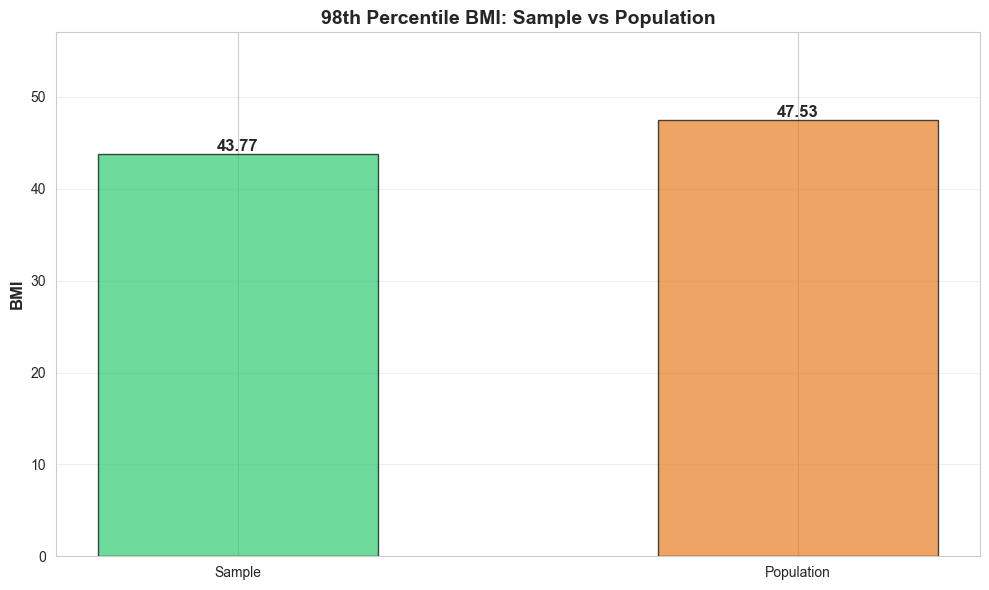

Chart saved!


In [8]:
# visualization 1 bar chart for 98th percentile comparison
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Sample', 'Population']
percentiles = [sample_bmi_98th, pop_bmi_98th]
colors = ['#2ecc71', '#e67e22']

bars = ax.bar(categories, percentiles, color=colors, alpha=0.7, edgecolor='black', width=0.5)

ax.set_ylabel('BMI', fontsize=12, fontweight='bold')
ax.set_title('98th Percentile BMI: Sample vs Population', fontsize=14, fontweight='bold')
ax.set_ylim([0, max(percentiles) * 1.2])
ax.grid(axis='y', alpha=0.3)

# add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('../figures/part_b_bmi_98th_percentile.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved!")

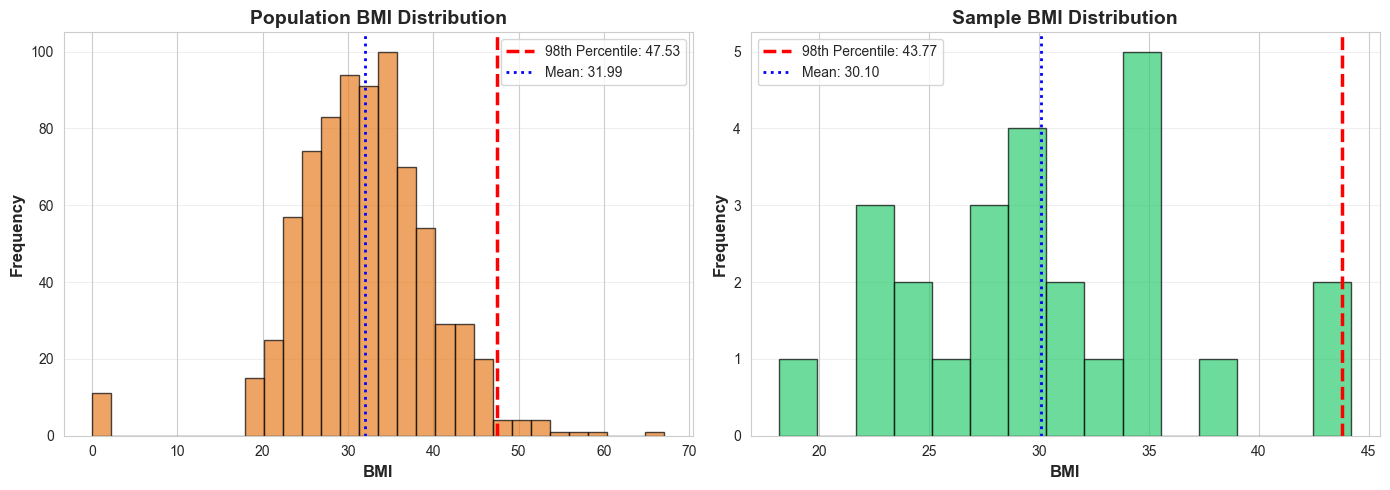

Chart saved!


In [9]:
# visualization 2 BMI distribution with percentile lines
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# histogram with percentile line for population
ax1 = axes[0]
ax1.hist(df['BMI'], bins=30, alpha=0.7, color='#e67e22', edgecolor='black')
ax1.axvline(pop_bmi_98th, color='red', linestyle='--', linewidth=2.5, label=f'98th Percentile: {pop_bmi_98th:.2f}')
ax1.axvline(pop_bmi_mean, color='blue', linestyle=':', linewidth=2, label=f'Mean: {pop_bmi_mean:.2f}')
ax1.set_xlabel('BMI', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Population BMI Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# histogram with percentile line for sample
ax2 = axes[1]
ax2.hist(sample_df['BMI'], bins=15, alpha=0.7, color='#2ecc71', edgecolor='black')
ax2.axvline(sample_bmi_98th, color='red', linestyle='--', linewidth=2.5, label=f'98th Percentile: {sample_bmi_98th:.2f}')
ax2.axvline(sample_bmi_mean, color='blue', linestyle=':', linewidth=2, label=f'Mean: {sample_bmi_mean:.2f}')
ax2.set_xlabel('BMI', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Sample BMI Distribution', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/part_b_bmi_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved!")

## C) Bootstrap Analysis for BloodPressure

In [10]:
# bootstrap parameters
n_bootstrap = 500
bootstrap_sample_size = 150

# arrays to store statistics from each bootstrap sample
bootstrap_means = []
bootstrap_stds = []
bootstrap_98th_percentiles = []

# bootstrap sampling
print("Performing bootstrap sampling...")
for i in range(n_bootstrap):
    # take a random sample with replacement
    bootstrap_sample = df['BloodPressure'].sample(n=bootstrap_sample_size, replace=True, random_state=SEED+i)
    
    # calculate statistics
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_98th_percentiles.append(np.percentile(bootstrap_sample, 98))

# calculate average statistics from bootstrap samples
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_98th = np.mean(bootstrap_98th_percentiles)

# calculate population statistics
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_98th = np.percentile(df['BloodPressure'], 98)

# calculate confidence intervals (95%)
ci_lower_mean = np.percentile(bootstrap_means, 2.5)
ci_upper_mean = np.percentile(bootstrap_means, 97.5)
ci_lower_std = np.percentile(bootstrap_stds, 2.5)
ci_upper_std = np.percentile(bootstrap_stds, 97.5)
ci_lower_98th = np.percentile(bootstrap_98th_percentiles, 2.5)
ci_upper_98th = np.percentile(bootstrap_98th_percentiles, 97.5)

print(f"Bootstrap sampling complete! ({n_bootstrap} samples of size {bootstrap_sample_size})")

Performing bootstrap sampling...
Bootstrap sampling complete! (500 samples of size 150)


In [11]:
# display results
print("=" * 80)
print("PART C: BOOTSTRAP ANALYSIS FOR BLOOD PRESSURE")
print("=" * 80)
print(f"\nBootstrap Parameters:")
print(f"  - Number of bootstrap samples: {n_bootstrap}")
print(f"  - Size of each bootstrap sample: {bootstrap_sample_size}")
print(f"  - Population size: {len(df)}")

print(f"\n{'Statistic':<25} {'Bootstrap Avg':<18} {'Population':<15} {'Difference':<12}")
print("-" * 70)
print(f"{'Mean BP':<25} {avg_bootstrap_mean:<18.2f} {pop_bp_mean:<15.2f} {abs(avg_bootstrap_mean - pop_bp_mean):<12.2f}")
print(f"{'Standard Deviation BP':<25} {avg_bootstrap_std:<18.2f} {pop_bp_std:<15.2f} {abs(avg_bootstrap_std - pop_bp_std):<12.2f}")
print(f"{'98th Percentile BP':<25} {avg_bootstrap_98th:<18.2f} {pop_bp_98th:<15.2f} {abs(avg_bootstrap_98th - pop_bp_98th):<12.2f}")

print(f"\n95% Confidence Intervals from Bootstrap:")
print(f"  - Mean: [{ci_lower_mean:.2f}, {ci_upper_mean:.2f}]")
print(f"  - Standard Deviation: [{ci_lower_std:.2f}, {ci_upper_std:.2f}]")
print(f"  - 98th Percentile: [{ci_lower_98th:.2f}, {ci_upper_98th:.2f}]")
print("=" * 80)

PART C: BOOTSTRAP ANALYSIS FOR BLOOD PRESSURE

Bootstrap Parameters:
  - Number of bootstrap samples: 500
  - Size of each bootstrap sample: 150
  - Population size: 768

Statistic                 Bootstrap Avg      Population      Difference  
----------------------------------------------------------------------
Mean BP                   69.17              69.11           0.07        
Standard Deviation BP     19.20              19.36           0.16        
98th Percentile BP        98.30              99.32           1.02        

95% Confidence Intervals from Bootstrap:
  - Mean: [65.95, 72.15]
  - Standard Deviation: [14.74, 23.18]
  - 98th Percentile: [90.14, 108.04]


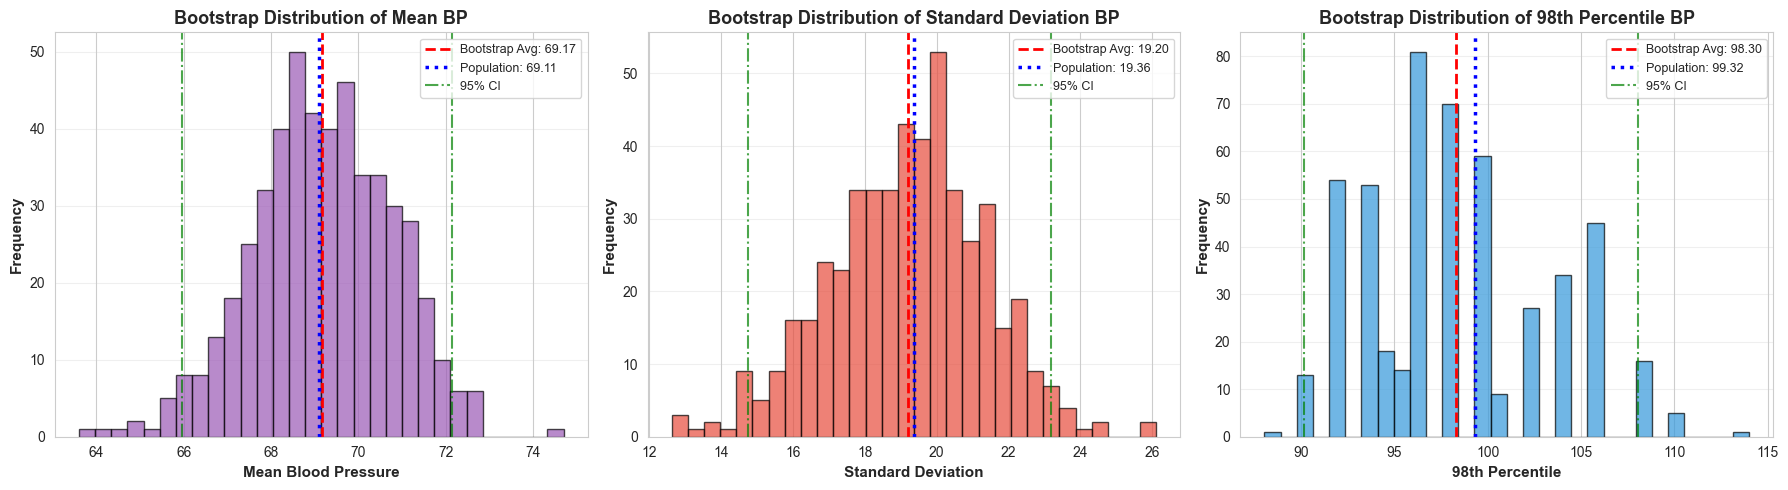

Chart saved!


In [12]:
# visualization 1 bootstrap distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# mean distribution
ax1 = axes[0]
ax1.hist(bootstrap_means, bins=30, alpha=0.7, color='#9b59b6', edgecolor='black')
ax1.axvline(avg_bootstrap_mean, color='red', linestyle='--', linewidth=2, label=f'Bootstrap Avg: {avg_bootstrap_mean:.2f}')
ax1.axvline(pop_bp_mean, color='blue', linestyle=':', linewidth=2.5, label=f'Population: {pop_bp_mean:.2f}')
ax1.axvline(ci_lower_mean, color='green', linestyle='-.', linewidth=1.5, alpha=0.7)
ax1.axvline(ci_upper_mean, color='green', linestyle='-.', linewidth=1.5, alpha=0.7, label='95% CI')
ax1.set_xlabel('Mean Blood Pressure', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Bootstrap Distribution of Mean BP', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# standard deviation distribution
ax2 = axes[1]
ax2.hist(bootstrap_stds, bins=30, alpha=0.7, color='#e74c3c', edgecolor='black')
ax2.axvline(avg_bootstrap_std, color='red', linestyle='--', linewidth=2, label=f'Bootstrap Avg: {avg_bootstrap_std:.2f}')
ax2.axvline(pop_bp_std, color='blue', linestyle=':', linewidth=2.5, label=f'Population: {pop_bp_std:.2f}')
ax2.axvline(ci_lower_std, color='green', linestyle='-.', linewidth=1.5, alpha=0.7)
ax2.axvline(ci_upper_std, color='green', linestyle='-.', linewidth=1.5, alpha=0.7, label='95% CI')
ax2.set_xlabel('Standard Deviation', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title('Bootstrap Distribution of Standard Deviation BP', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# 98th percentile distribution
ax3 = axes[2]
ax3.hist(bootstrap_98th_percentiles, bins=30, alpha=0.7, color='#3498db', edgecolor='black')
ax3.axvline(avg_bootstrap_98th, color='red', linestyle='--', linewidth=2, label=f'Bootstrap Avg: {avg_bootstrap_98th:.2f}')
ax3.axvline(pop_bp_98th, color='blue', linestyle=':', linewidth=2.5, label=f'Population: {pop_bp_98th:.2f}')
ax3.axvline(ci_lower_98th, color='green', linestyle='-.', linewidth=1.5, alpha=0.7)
ax3.axvline(ci_upper_98th, color='green', linestyle='-.', linewidth=1.5, alpha=0.7, label='95% CI')
ax3.set_xlabel('98th Percentile', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Bootstrap Distribution of 98th Percentile BP', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/part_c_bootstrap_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved!")

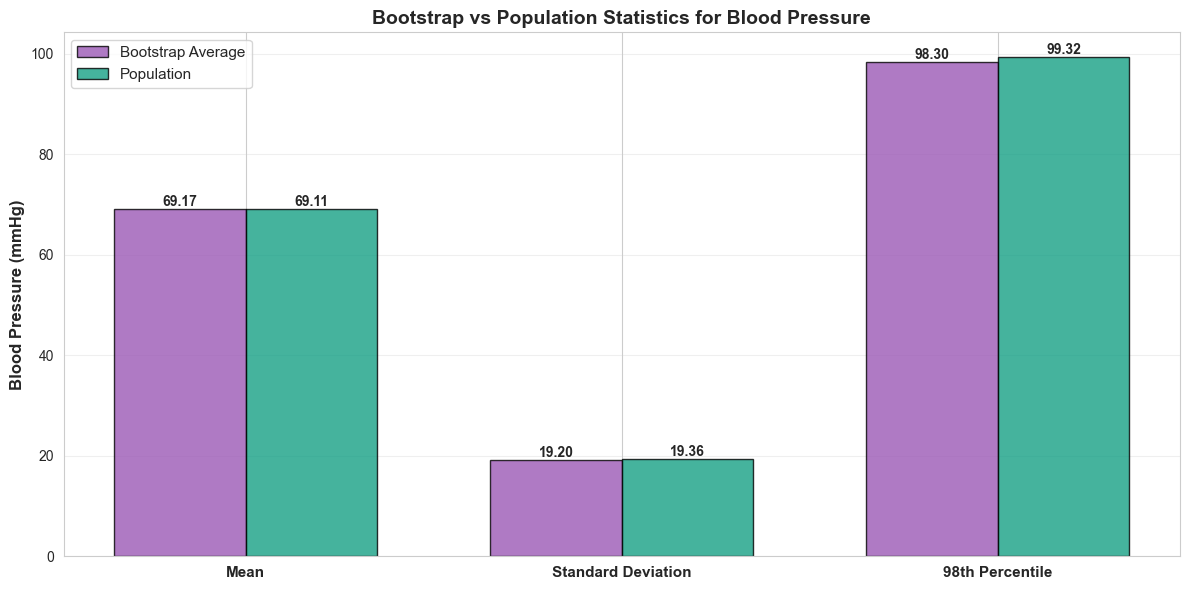

Chart saved!


In [13]:
# visualization 2 comparison bar charts
fig, ax = plt.subplots(figsize=(12, 6))

# data for plotting
statistics = ['Mean', 'Standard Deviation', '98th Percentile']
bootstrap_values = [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_98th]
population_values = [pop_bp_mean, pop_bp_std, pop_bp_98th]

x = np.arange(len(statistics))
width = 0.35

# create bars
bars1 = ax.bar(x - width/2, bootstrap_values, width, label='Bootstrap Average', 
               color='#9b59b6', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, population_values, width, label='Population', 
               color='#16a085', alpha=0.8, edgecolor='black')

# customize plot
ax.set_ylabel('Blood Pressure (mmHg)', fontsize=12, fontweight='bold')
ax.set_title('Bootstrap vs Population Statistics for Blood Pressure', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(statistics, fontsize=11, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../figures/part_c_bootstrap_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved!")

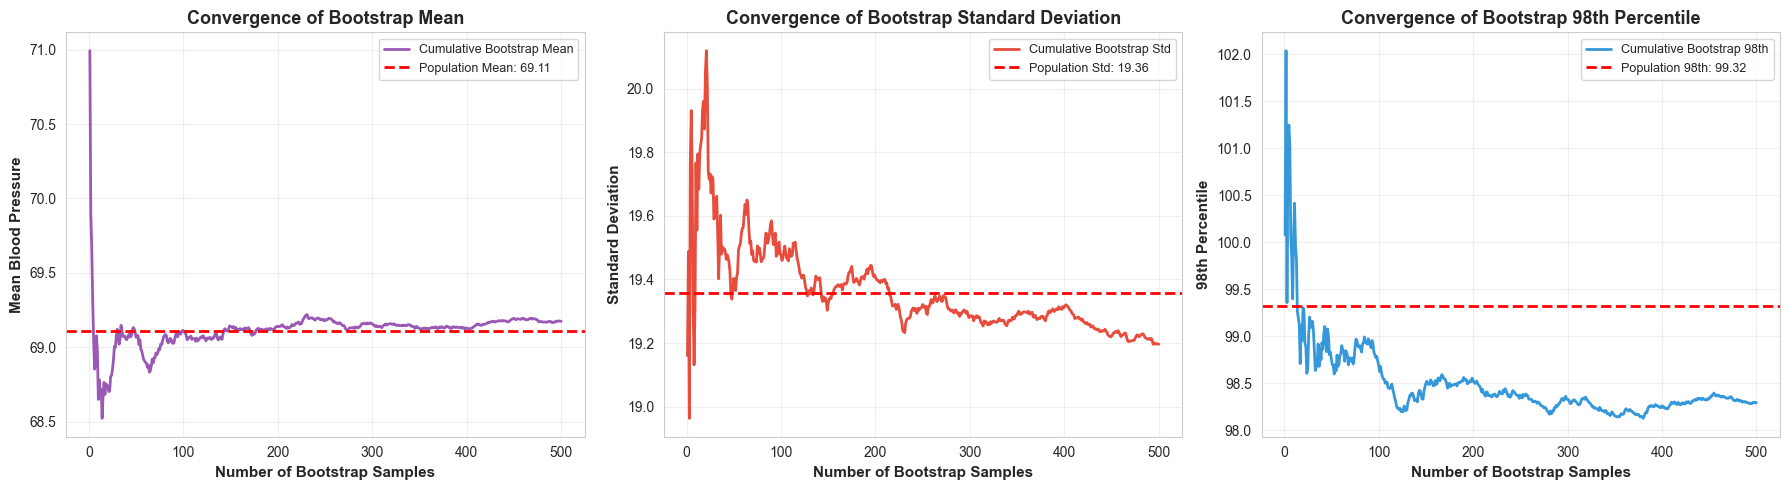

Chart saved!


In [14]:
# visualization 3 convergence plot - showing how bootstrap estimates stabilize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# calculate cumulative averages
cumulative_means = np.cumsum(bootstrap_means) / np.arange(1, n_bootstrap + 1)
cumulative_stds = np.cumsum(bootstrap_stds) / np.arange(1, n_bootstrap + 1)
cumulative_98ths = np.cumsum(bootstrap_98th_percentiles) / np.arange(1, n_bootstrap + 1)

# mean convergence
ax1 = axes[0]
ax1.plot(range(1, n_bootstrap + 1), cumulative_means, color='#9b59b6', linewidth=2, label='Cumulative Bootstrap Mean')
ax1.axhline(pop_bp_mean, color='red', linestyle='--', linewidth=2, label=f'Population Mean: {pop_bp_mean:.2f}')
ax1.set_xlabel('Number of Bootstrap Samples', fontsize=11, fontweight='bold')
ax1.set_ylabel('Mean Blood Pressure', fontsize=11, fontweight='bold')
ax1.set_title('Convergence of Bootstrap Mean', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# standard deviation convergence
ax2 = axes[1]
ax2.plot(range(1, n_bootstrap + 1), cumulative_stds, color='#e74c3c', linewidth=2, label='Cumulative Bootstrap Std')
ax2.axhline(pop_bp_std, color='red', linestyle='--', linewidth=2, label=f'Population Std: {pop_bp_std:.2f}')
ax2.set_xlabel('Number of Bootstrap Samples', fontsize=11, fontweight='bold')
ax2.set_ylabel('Standard Deviation', fontsize=11, fontweight='bold')
ax2.set_title('Convergence of Bootstrap Standard Deviation', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(alpha=0.3)

# 98th percentile convergence
ax3 = axes[2]
ax3.plot(range(1, n_bootstrap + 1), cumulative_98ths, color='#3498db', linewidth=2, label='Cumulative Bootstrap 98th')
ax3.axhline(pop_bp_98th, color='red', linestyle='--', linewidth=2, label=f'Population 98th: {pop_bp_98th:.2f}')
ax3.set_xlabel('Number of Bootstrap Samples', fontsize=11, fontweight='bold')
ax3.set_ylabel('98th Percentile', fontsize=11, fontweight='bold')
ax3.set_title('Convergence of Bootstrap 98th Percentile', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/part_c_bootstrap_convergence.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved!")

## Summary of Findings

In [ ]:
# export summary statistics to CSV for reference
summary_data = {
    'Statistic': ['Mean', 'Standard Deviation', '98th Percentile'],
    'Bootstrap_Average': [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_98th],
    'Population': [pop_bp_mean, pop_bp_std, pop_bp_98th],
    'Difference': [
        abs(avg_bootstrap_mean - pop_bp_mean),
        abs(avg_bootstrap_std - pop_bp_std),
        abs(avg_bootstrap_98th - pop_bp_98th)
    ],
    'CI_Lower': [ci_lower_mean, ci_lower_std, ci_lower_98th],
    'CI_Upper': [ci_upper_mean, ci_upper_std, ci_upper_98th]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('../data/processed/bootstrap_summary.csv', index=False)

print("Summary statistics saved to bootstrap_summary.csv")

Summary statistics saved to bootstrap_summary.csv
